In [1]:
import collections
from collections import OrderedDict
import pandas as pd
import time as tm

In [2]:
run -i "base_compression.py"

In [3]:
run -i "box_car_algorithm.py"

In [4]:
run -i "swinging_door_algorithm.py"

In [5]:
run -i "hybrid_compression.py"

In [6]:
run -i "unordered_time_series_compressor.py"

# Example 1: Run thousands of data points

First showcase running thousands of data points, which represent some counter values from a software system.

In [7]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [8]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
shuffled_df = df.sample(frac=1)

data = {}

for index, row in shuffled_df.iterrows():
    data[index] = row['Counter']

In [9]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 1611.7915573033674
Initial deviation: 1193.4916000205662
Initial deviation: 1291.3758117775255
Initial deviation: 1825.7197598429525
0.05696606636047363  seconds time elapsed in running box car.
5955 number of data points discarded as part of box car window
515 data points remaining


In [10]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [11]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 1611.7915573033674
Initial deviation: 1193.4916000205662
Initial deviation: 1291.3758117775255
Initial deviation: 1824.9174813374777
0.146806001663208  seconds time elapsed in running exception.
5996 number of data points discarded as part of swinging door window
474 data points remaining


In [12]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [13]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 1611.7915573033674
Initial deviation: 1193.4916000205662
Initial deviation: 1291.3758117775255
Initial deviation: 1824.9174813374777
0.1524190902709961  seconds time elapsed in running exception.
5996 number of data points discarded as part of exception window
474 data points remaining


In [14]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices', 'datetime', 'inf', 'sqrt', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


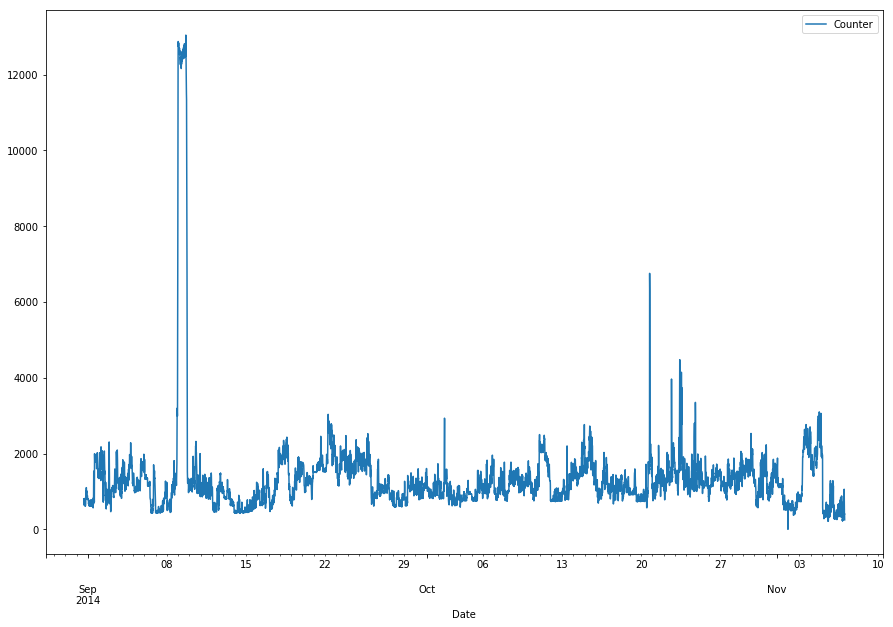

In [15]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


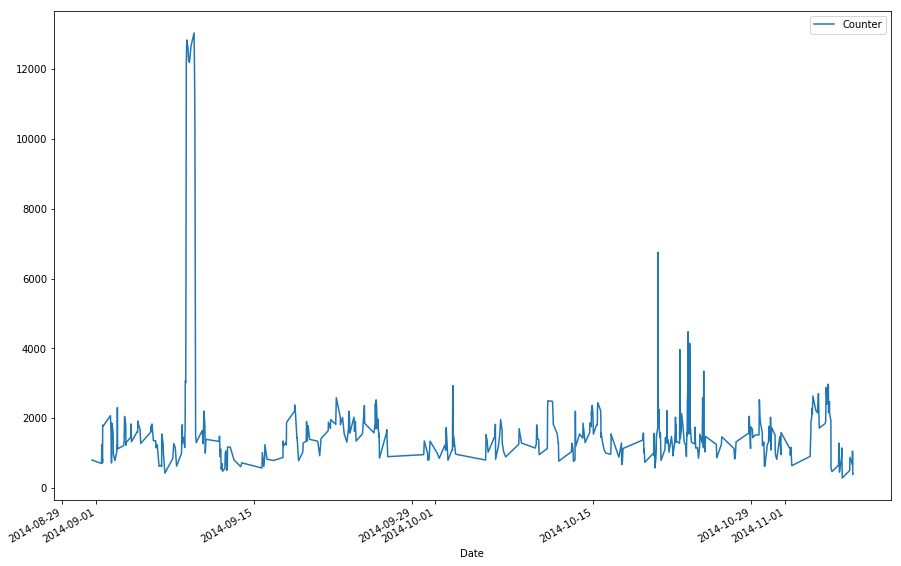

In [16]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


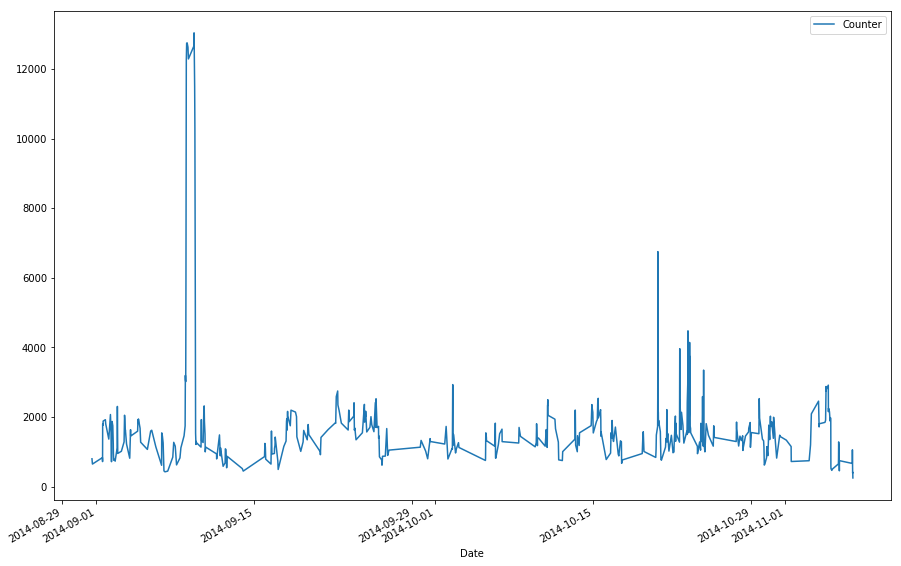

In [17]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


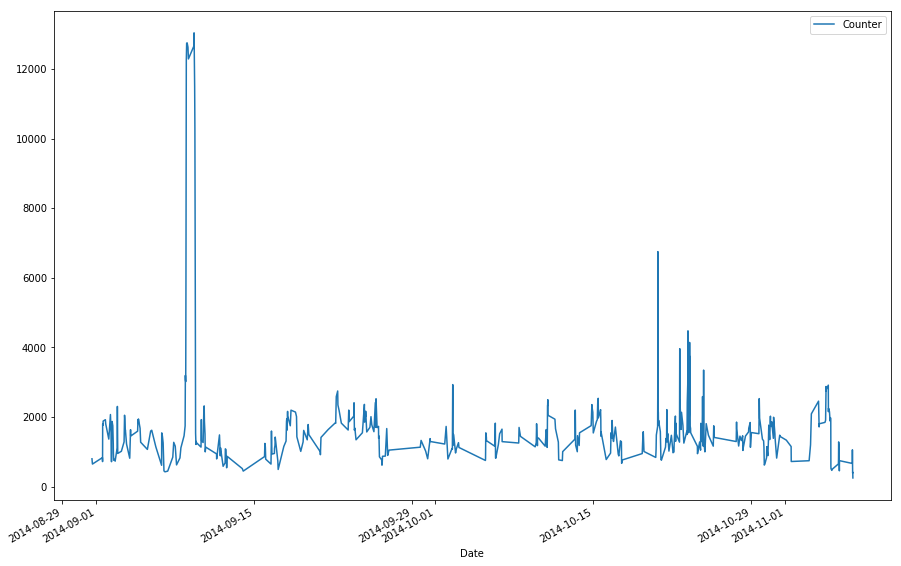

In [18]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 2: Run tens of data points

Second showcase tens of float data points.

In [19]:
data_size = 30
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [20]:
df = pd.read_csv('data/sample2.csv', parse_dates=True, index_col=0)
df['Value'] = df['Value'].astype(float)
data = {}
shuffled_df = df.sample(frac=1)

for index, row in shuffled_df.iterrows():
    data[index] = row['Value']

In [21]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 5.040540259889245
Initial deviation: 14.129960252678513
Initial deviation: 12.451320670145028
Initial deviation: 14.324454023758706
0.0018641948699951172  seconds time elapsed in running box car.
41 number of data points discarded as part of box car window
30 data points remaining


In [22]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [23]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 5.040540259889245
Initial deviation: 14.129960252678513
Initial deviation: 12.451320670145028
Initial deviation: 13.756626711903344
0.002923727035522461  seconds time elapsed in running exception.
38 number of data points discarded as part of swinging door window
33 data points remaining


In [24]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [25]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 5.040540259889245
Initial deviation: 14.129960252678513
Initial deviation: 12.451320670145028
Initial deviation: 13.756626711903344
0.0029268264770507812  seconds time elapsed in running exception.
38 number of data points discarded as part of exception window
33 data points remaining


In [26]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


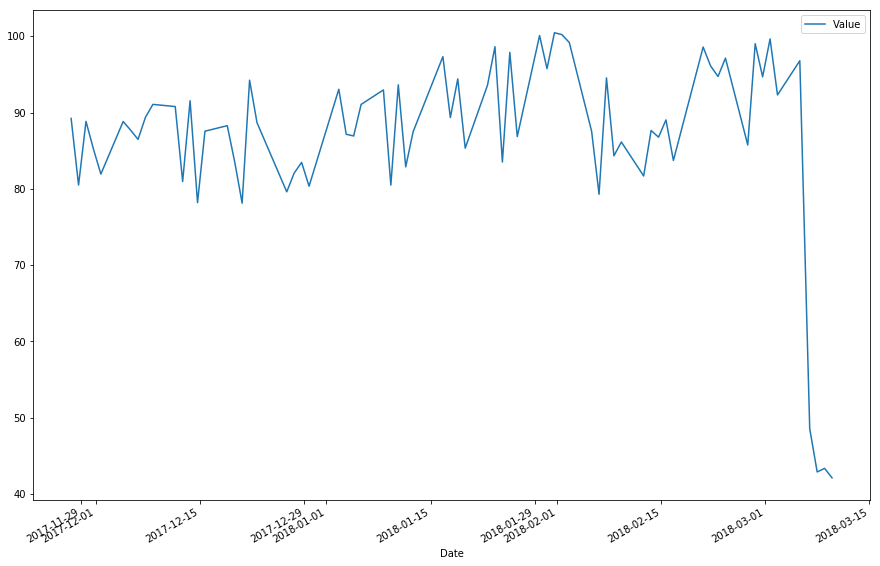

In [27]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


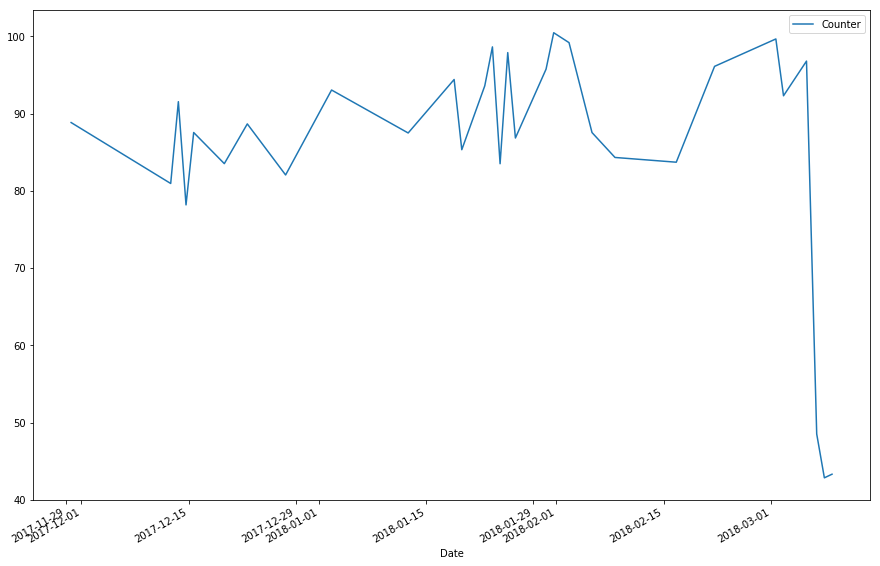

In [28]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


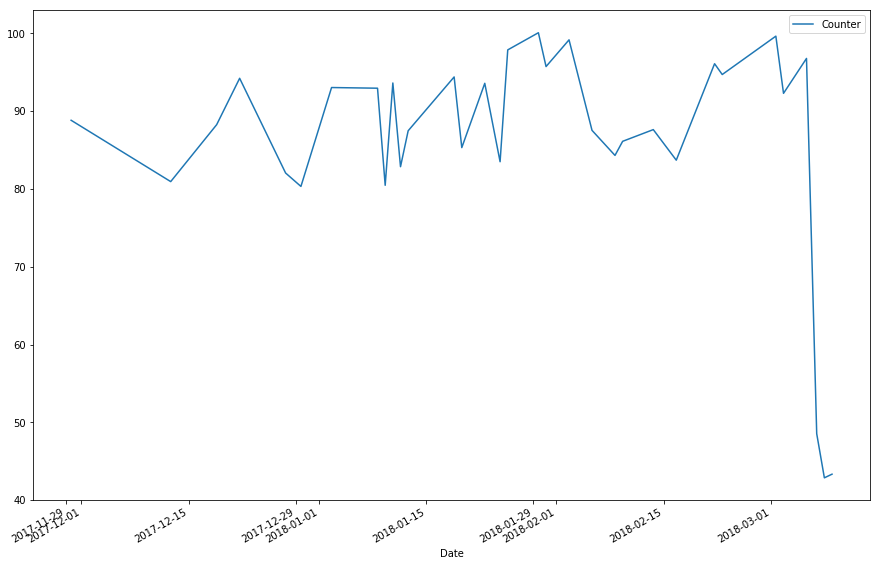

In [29]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


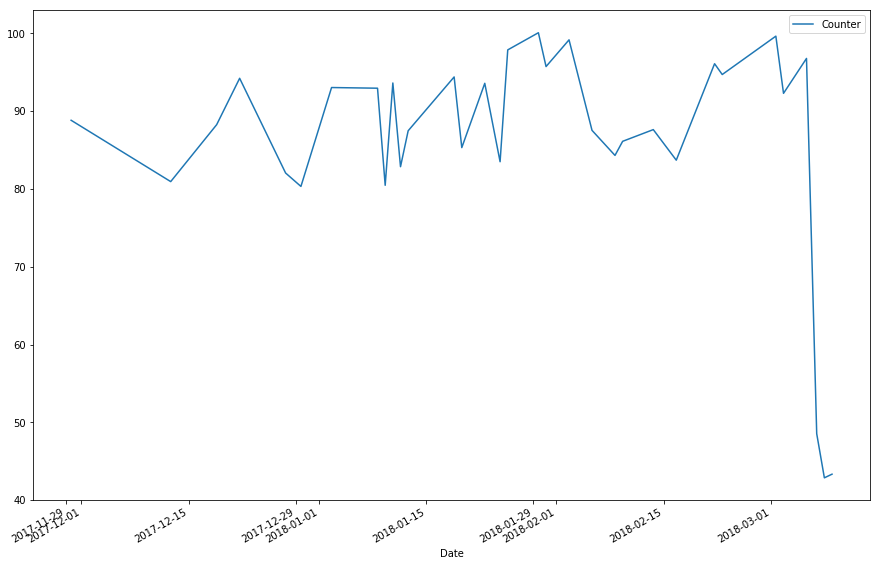

In [30]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 3: Run millions of data points

Third showcase large dataset, random generated from excel with some range.

In [31]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [32]:
df = pd.read_csv('data/sample3.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}
shuffled_df = df.sample(frac=1)

for index, row in shuffled_df.iterrows():
    data[index] = row['Counter']

In [33]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 37580.48086310743
Initial deviation: 37241.73101119615
Initial deviation: 37211.531382820234
Initial deviation: 37358.692756575525
Initial deviation: 37339.67313426685
Initial deviation: 36940.639978004845
Initial deviation: 37319.86663971218
Initial deviation: 37130.47858614521
Initial deviation: 37037.58490039479
Initial deviation: 37431.78291696022
Initial deviation: 37327.41052991744
Initial deviation: 37396.44481007922
Initial deviation: 37205.16169131961
Initial deviation: 37460.98544640913
Initial deviation: 37253.277134187025
Initial deviation: 37364.816577652164
Initial deviation: 37143.89288146089
Initial deviation: 37149.751202683816
Initial deviation: 36979.91122373647
Initial deviation: 37335.583313265546
Initial deviation: 37376.186698692865
Initial deviation: 37154.39944512031
Initial deviation: 36903.543204994814
Initial deviation: 37104.78447928967
Initial deviation: 37221.35806200415
Initial deviation: 36841.85535896369
Initial deviation: 37011.4163

In [34]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [35]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 37580.48086310743
Initial deviation: 37241.73101119615
Initial deviation: 37211.531382820234
Initial deviation: 37358.692756575525
Initial deviation: 37339.67313426685
Initial deviation: 36940.639978004845
Initial deviation: 37319.86663971218
Initial deviation: 37130.47858614521
Initial deviation: 37037.58490039479
Initial deviation: 37431.78291696022
Initial deviation: 37327.41052991744
Initial deviation: 37396.44481007922
Initial deviation: 37205.16169131961
Initial deviation: 37460.98544640913
Initial deviation: 37253.277134187025
Initial deviation: 37364.816577652164
Initial deviation: 37143.89288146089
Initial deviation: 37149.751202683816
Initial deviation: 36979.91122373647
Initial deviation: 37335.583313265546
Initial deviation: 37376.186698692865
Initial deviation: 37154.39944512031
Initial deviation: 36903.543204994814
Initial deviation: 37104.78447928967
Initial deviation: 37221.35806200415
Initial deviation: 36841.85535896369
Initial deviation: 37011.4163

In [36]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [37]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 37580.48086310743
Initial deviation: 37241.73101119615
Initial deviation: 37211.531382820234
Initial deviation: 37358.692756575525
Initial deviation: 37339.67313426685
Initial deviation: 36940.639978004845
Initial deviation: 37319.86663971218
Initial deviation: 37130.47858614521
Initial deviation: 37037.58490039479
Initial deviation: 37431.78291696022
Initial deviation: 37327.41052991744
Initial deviation: 37396.44481007922
Initial deviation: 37205.16169131961
Initial deviation: 37460.98544640913
Initial deviation: 37253.277134187025
Initial deviation: 37364.816577652164
Initial deviation: 37143.89288146089
Initial deviation: 37149.751202683816
Initial deviation: 36979.91122373647
Initial deviation: 37335.583313265546
Initial deviation: 37376.186698692865
Initial deviation: 37154.39944512031
Initial deviation: 36903.543204994814
Initial deviation: 37104.78447928967
Initial deviation: 37221.35806200415
Initial deviation: 36841.85535896369
Initial deviation: 37011.4163

In [38]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


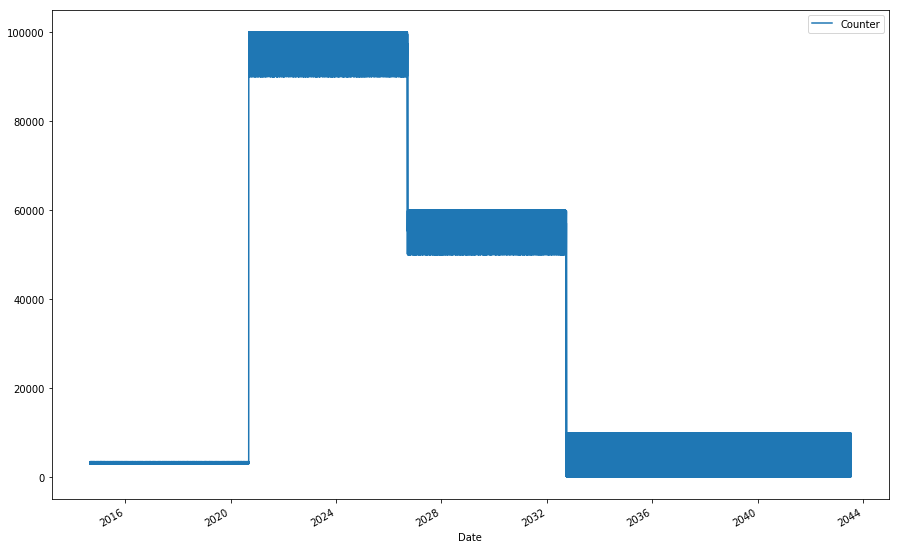

In [39]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


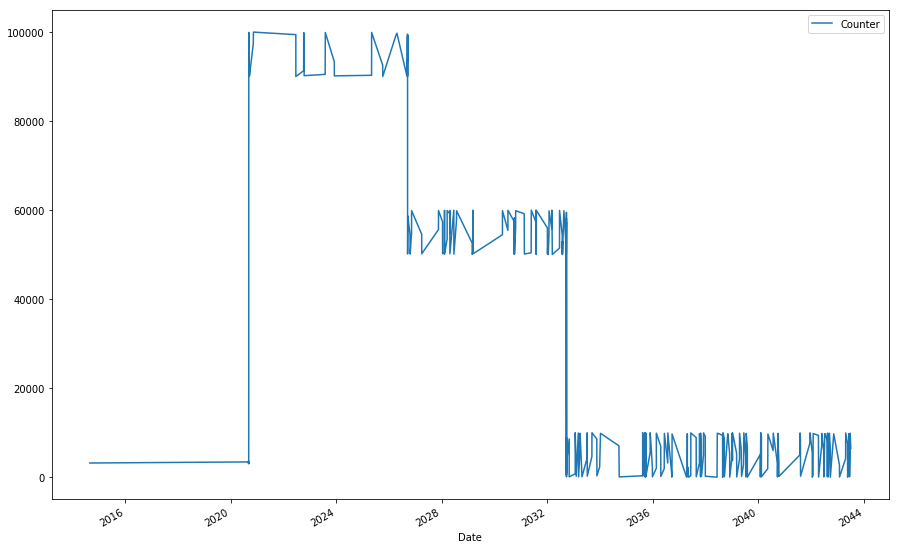

In [40]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


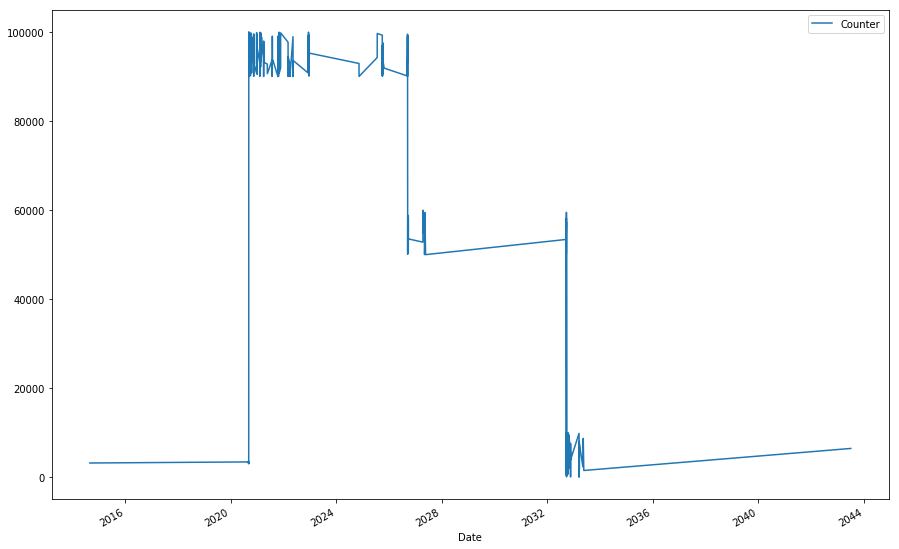

In [41]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


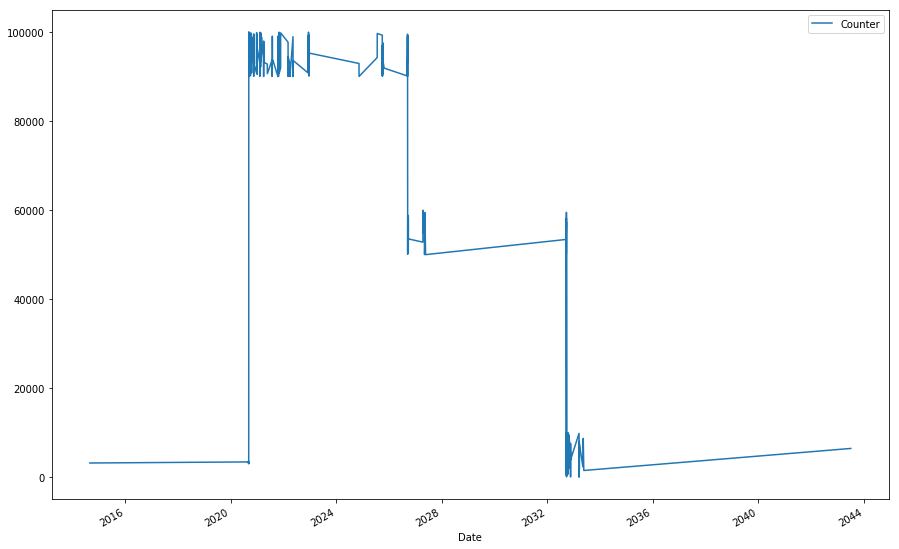

In [42]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()